# Big project activity

## Optimal charging station location

### 1.Introduction

Consider a long linear cycle path as Vento, or the Danube cycle path. The cycle path usually runs along the banks of a river with scarce tourist interest. However, from the main course of the cycle path, it is possible to reach places of tourist interest in making small detours.  

The rapid growth of e-bike ridership is proposing the problem of deploying a suitable charging infrastructure. The charging stations should be placed in strategic positions so as to guarantee a coverage of the whole cycle path. However, since the charging operations require a non-negligible time, the charging station should be positioned in places where alternative activities could be carried out, as restaurants, museums, swimming pool, or other amenities. Moreover, the presence of a charging station could also induce e-cyclists to discover new places and generate positive externalities.



### 2.Decision problem
We can represent the cycle path as a graph where the set of nodes $H = \{1,\ldots, n\}$ corresponds to the tourist sites that may host a charging station.
In addition, we are given the distances between touristic sites ($d_{ij},$ with $ i,j =1,\ldots,n$). Let $c_i$ be the cost of installing a charging station in site $i, i=1\ldots, n$.


The problem is, given a budget $b$, determine the subset of sites $S\subseteq H$ where to install the charging stations so that the total cost is not higher than $b$ and the maximum distance between consecutive charging stations is minimized.
Consider that the cyclist has to visit all the touristic destinations in a consecutive way.



### 3.Problem characteristics
There are 2 csv files that contain the information of the cycle way, they are essential to build the equivalent graph:


*    in the "nodes.csv" file, there are all the destinations that the cyclist can reach, with their spatial coordinates and the value of installation costs related to that destination. Consider that the "tourist-dest-id" is not the graph node number, but it is a unique id to identify the destination.
*   in the "OD.csv" you can find all the arcs between two different nodes, keep attention that the condition of visiting consecutive touristic destination must be respected.

The set of nodes $N$ is defined by $\{0,1,\ldots,n, n+1\}$.  The Arcs $A$ correspond to the portion of cycle path between two consecutive charging stations. We assume that potentially e-riders will visit all sites along the way, making the suitable deviations and going back to the main path at the initial point of the detour.
The cost associated with each arc $(i,j)$ is given by $c_j$, thus the cost of installing a charging station in $j$. These costs are defined for all arcs in $A$, while they are set to 0 for all the arcs that arrive in the last node.
The path starts in node $s = 0$ and ends in node $t = n+1$, these two nodes are connected to the nearest touristic site with an arc of null length.

### 4.Example of a linear path with deviation
![picture](https://drive.google.com/uc?export=view&id=1w16bHtbu0FGGL-UntxeqxD7244D3eHbJ)

### 5.Requirements
The requirements of the problem are:


*   the maximum running time of the algorithm must be 5 minutes, so set the proper timer
*   create the equivalent graph and display it on a xy-plot
*   find the solution for the basic scenario, with a mip model, displaying the solution with a xy-plot, the budget constraint is $b = 10000\ € $.
*   Find the optimal solution for 5 different values of budget in the range $[10000, 100000]$. Select the values of the budget so as to have different charger locations.

  You have to motivate your choice and the solution you get. They can also be not common solution if they are well motivated. To support your decision and explanations, you can print plots or tables. You can also compare different scenarios.


   
If you have some doubts related to the parametric analysis, prof. Cubillos uploaded a notebook with the solution on WeBeeP and you can have a look there.

### Insert student name and student ID

student1:

ID1:

student2:

ID2:

student3

ID3:



In [1]:
#install libraries
!pip install mip
!pip install --upgrade cffi==1.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.15.1
    Uninstalling cffi-1.15.1:
      Successfully uninstalled cffi-1.15.1


In [2]:
#import libraries
import importlib
import cffi

importlib.reload(cffi)
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

In [25]:
# set the budget
budget: int = 10_000
# budget = random.randint(10000, 100000)
print(f"Budget: {budget:,.2f} €")

Budget: 10,000.00 €


In [5]:
# Load nodes data from CSV
nodes_data: pd.DataFrame = pd.read_csv('/content/nodes.csv')

# Display information about candidate touristic sites and nodes
num_nodes: int = len(nodes_data) + 2
print(f"Number of candidate touristic sites: {len(nodes_data)}")
print(f"Number of Nodes (including source and sink): {num_nodes}")

# Load OD data from CSV and map node IDs
od_data: pd.DataFrame = pd.read_csv('/content/OD.csv')
node_id_mapping: dict[int, int] = {node_id: i for i, node_id in enumerate(nodes_data['tourist_dest_id'])}
od_data[['origin_id', 'destination_id']] = od_data[['origin_id', 'destination_id']].apply(
    lambda x: x.map(node_id_mapping))

# Map node IDs in nodes_data
nodes_data['tourist_dest_id'] = nodes_data['tourist_dest_id'].map(node_id_mapping)

# Display the number of arcs and the node ID mapping
print(f"Number of arcs: {len(od_data)}")
print(f"Node ID Mapping: {node_id_mapping}")

Number of candidate touristic sites: 44
Number of Nodes (including source and sink): 46
Number of arcs: 1936
Node ID Mapping: {0: 0, 17: 1, 18: 2, 20: 3, 21: 4, 23: 5, 24: 6, 25: 7, 29: 8, 30: 9, 31: 10, 32: 11, 33: 12, 35: 13, 36: 14, 38: 15, 39: 16, 40: 17, 41: 18, 48: 19, 52: 20, 53: 21, 54: 22, 57: 23, 58: 24, 60: 25, 61: 26, 62: 27, 63: 28, 64: 29, 66: 30, 67: 31, 68: 32, 69: 33, 77: 34, 82: 35, 83: 36, 84: 37, 85: 38, 86: 39, 87: 40, 88: 41, 89: 42, 90: 43}


In [6]:
import folium
from branca.element import Figure


def create_folium_map(candidate_sites_coordinates: pd.DataFrame, center: list[float]) -> folium.Map:
    """
    Creates a Folium map with CircleMarkers for candidate sites.

    Parameters:
    - candidate_sites_coordinates (pd.DataFrame): DataFrame containing candidate sites data with 'y (latitude)', 'x (longitude)',
      'Comune', 'Piazza', and 'tourist_dest_id'.
    - center (List[float]): List representing the center location of the map [latitude, longitude].

    Returns:
    - folium.Map: Folium map with CircleMarkers for candidate sites.
    """
    # Initialize the map
    map = folium.Map(location=center, zoom_start=10)

    # Add CircleMarkers for each row in candidate_sites_coordinates
    for _, row in candidate_sites_coordinates.iterrows():
        popup_text = f"{row['Comune']} - {row['Piazza']}" if pd.notna(row['Piazza']) else f"{row['Comune']}"

        folium.CircleMarker(
            location=[row['y (latitude)'], row['x (longitude)']],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            popup=popup_text,
            tooltip=str(row['tourist_dest_id'])
        ).add_to(map)

    return map


# Center location
map_center: list[float] = [44.92803444, 10.52108953]

# Create Folium map with the specified center
nodes_map: folium.Map = create_folium_map(candidate_sites_coordinates=nodes_data, center=map_center)

# Create a Figure and add the Folium map to it
fig: Figure = Figure(width=1000, height=700)
fig.add_child(nodes_map)

# Display the Figure
fig

In [7]:
def find_first_node(nodes_data: pd.DataFrame) -> int:
    """
    Finds the first node based on the lowest value of longitude.

    Parameters:
    - nodes_data (pd.DataFrame): DataFrame containing node data with 'tourist_dest_id', 'x (longitude)', 'y (latitude)', etc.

    Returns:
    - int: The tourist destination ID of the node with the lowest longitude.
    """
    min_longitude_row = nodes_data.loc[nodes_data['x (longitude)'].idxmin()]
    return min_longitude_row['tourist_dest_id']


def find_last_node(nodes_data: pd.DataFrame) -> int:
    """
    Finds the last node based on the highest value of longitude.

    Parameters:
    - nodes_data (pd.DataFrame): DataFrame containing node data with 'tourist_dest_id', 'x (longitude)', 'y (latitude)', etc.

    Returns:
    - int: The tourist destination ID of the node with the highest longitude.
    """
    max_longitude_row = nodes_data.loc[nodes_data['x (longitude)'].idxmax()]
    return max_longitude_row['tourist_dest_id']


In [8]:
#set the timer
# Starting time
start_time = time.time()
#TO DO

## Shortest path -> Graph
This algorithm is used to find the shortest path between two nodes (head, tail). In this case:
- Head: 0
- Tail: 20 (52 in the original OD file) -> selected because is the furthest from 0 if we look at the path (this selection of the node could be automatized)

In [9]:
import mip

n = len(nodes_data)
distance_matrix = np.zeros((n, n))

od_data['distance [m]'].fillna(0, inplace=True)
od_data[['origin_id', 'destination_id']] = od_data[['origin_id', 'destination_id']].astype(int)

for _, row in od_data.iterrows():
    i, j = int(row['origin_id']), int(row['destination_id'])
    distance_matrix[i][j] = row['distance [m]']

# Create model
m = mip.Model()

# define the variables
x = [[m.add_var(var_type=mip.BINARY) for j in range(n)] for i in range(n)]

print(f"Number y (arc ij is selected or not) of variables: {len(x)}")

#  define the constraints
first_node = find_first_node(nodes_data)
last_node = find_last_node(nodes_data)


for i in range(n):
    m += x[i][i] == 0

    outgoing_arcs = mip.xsum(x[i][j] for j in range(n) if i != j)
    incoming_arcs = mip.xsum(x[j][i] for j in range(n) if i != j)

    m += outgoing_arcs == 0 if i == last_node else outgoing_arcs == 1
    m += incoming_arcs == 0 if i == first_node else incoming_arcs == 1

# Sub-tour elimination
u = [m.add_var() for i in range(n)]
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            m += u[i] - u[j] + (n - 1) * x[i][j] <= n - 2

# optimize objective function
m.objective = mip.minimize(mip.xsum(distance_matrix[i][j] * x[i][j] for i in range(n) for j in range(n)))

m.optimize()

# Extract the solution path
path = [(i, j) for i in range(n) for j in range(n) if x[i][j].x > 0.5]

# Display the solution path
print("Optimal path:", path)


# Extract the ordered path
current_node = 0
ordered_path = [current_node]

while current_node != 20:
    current_node = next(j for j in range(n) if x[current_node][j].x >= 0.99)
    ordered_path.append(current_node)

# Print the ordered path
print("Ordered path from 0 to 20:", ordered_path)

# Calculate total distance
total_distance = np.sum(distance_matrix[ordered_path[i], ordered_path[i + 1]] for i in range(len(ordered_path) - 1))
print("Total distance from start to finish:", total_distance)

Number y (arc ij is selected or not) of variables: 44
Optimal path: [(0, 43), (1, 2), (2, 3), (3, 4), (4, 5), (5, 34), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 33), (19, 24), (21, 20), (22, 21), (23, 22), (24, 23), (25, 19), (26, 27), (27, 25), (28, 26), (29, 28), (30, 29), (31, 30), (32, 31), (33, 32), (34, 6), (35, 36), (36, 37), (37, 1), (38, 39), (39, 35), (40, 38), (41, 40), (42, 41), (43, 42)]
Ordered path from 0 to 20: [0, 43, 42, 41, 40, 38, 39, 35, 36, 37, 1, 2, 3, 4, 5, 34, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 33, 32, 31, 30, 29, 28, 26, 27, 25, 19, 24, 23, 22, 21, 20]
Total distance from start to finish: 238507.22819670002


<ipython-input-9-b7f51b629e39>:66: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_distance = np.sum(distance_matrix[ordered_path[i], ordered_path[i + 1]] for i in range(len(ordered_path) - 1))


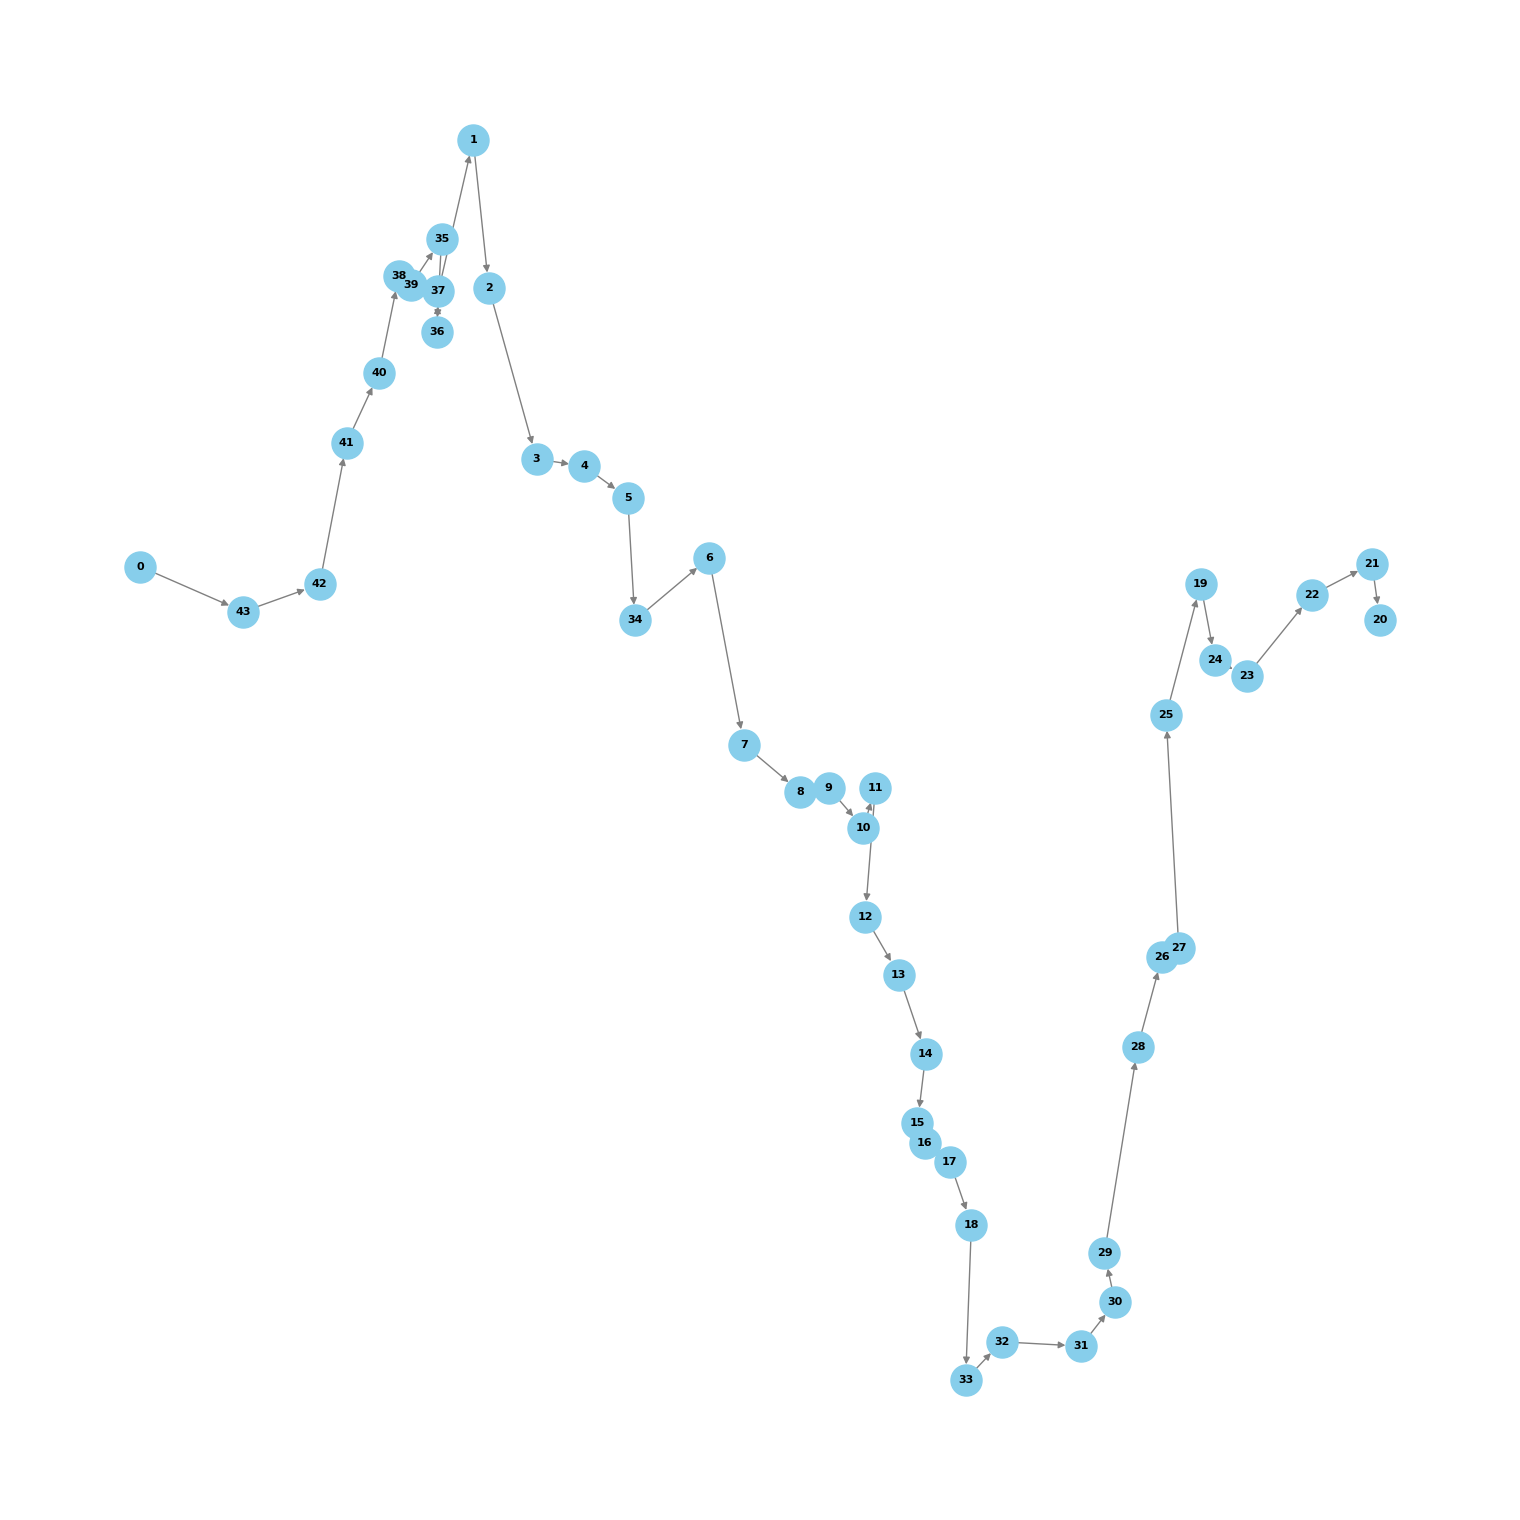

In [10]:
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(nodes_data.apply(lambda row: (
    row["tourist_dest_id"],
    {"pos": (row["x (longitude)"], row["y (latitude)"]), "label": f"{row['Comune']} - {row['Piazza']}"}
), axis=1).tolist())



# Add edges for the optimal path
G.add_edges_from([(origin, destination, {"distance": distance_matrix[origin][destination]}) for origin, destination in path])

plt.figure(figsize=(15, 15))

# Draw the graph
pos = nx.get_node_attributes(G, "pos")
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color="black", font_weight="bold",
        node_color="skyblue", edge_color="gray", arrowsize=10)

plt.show()

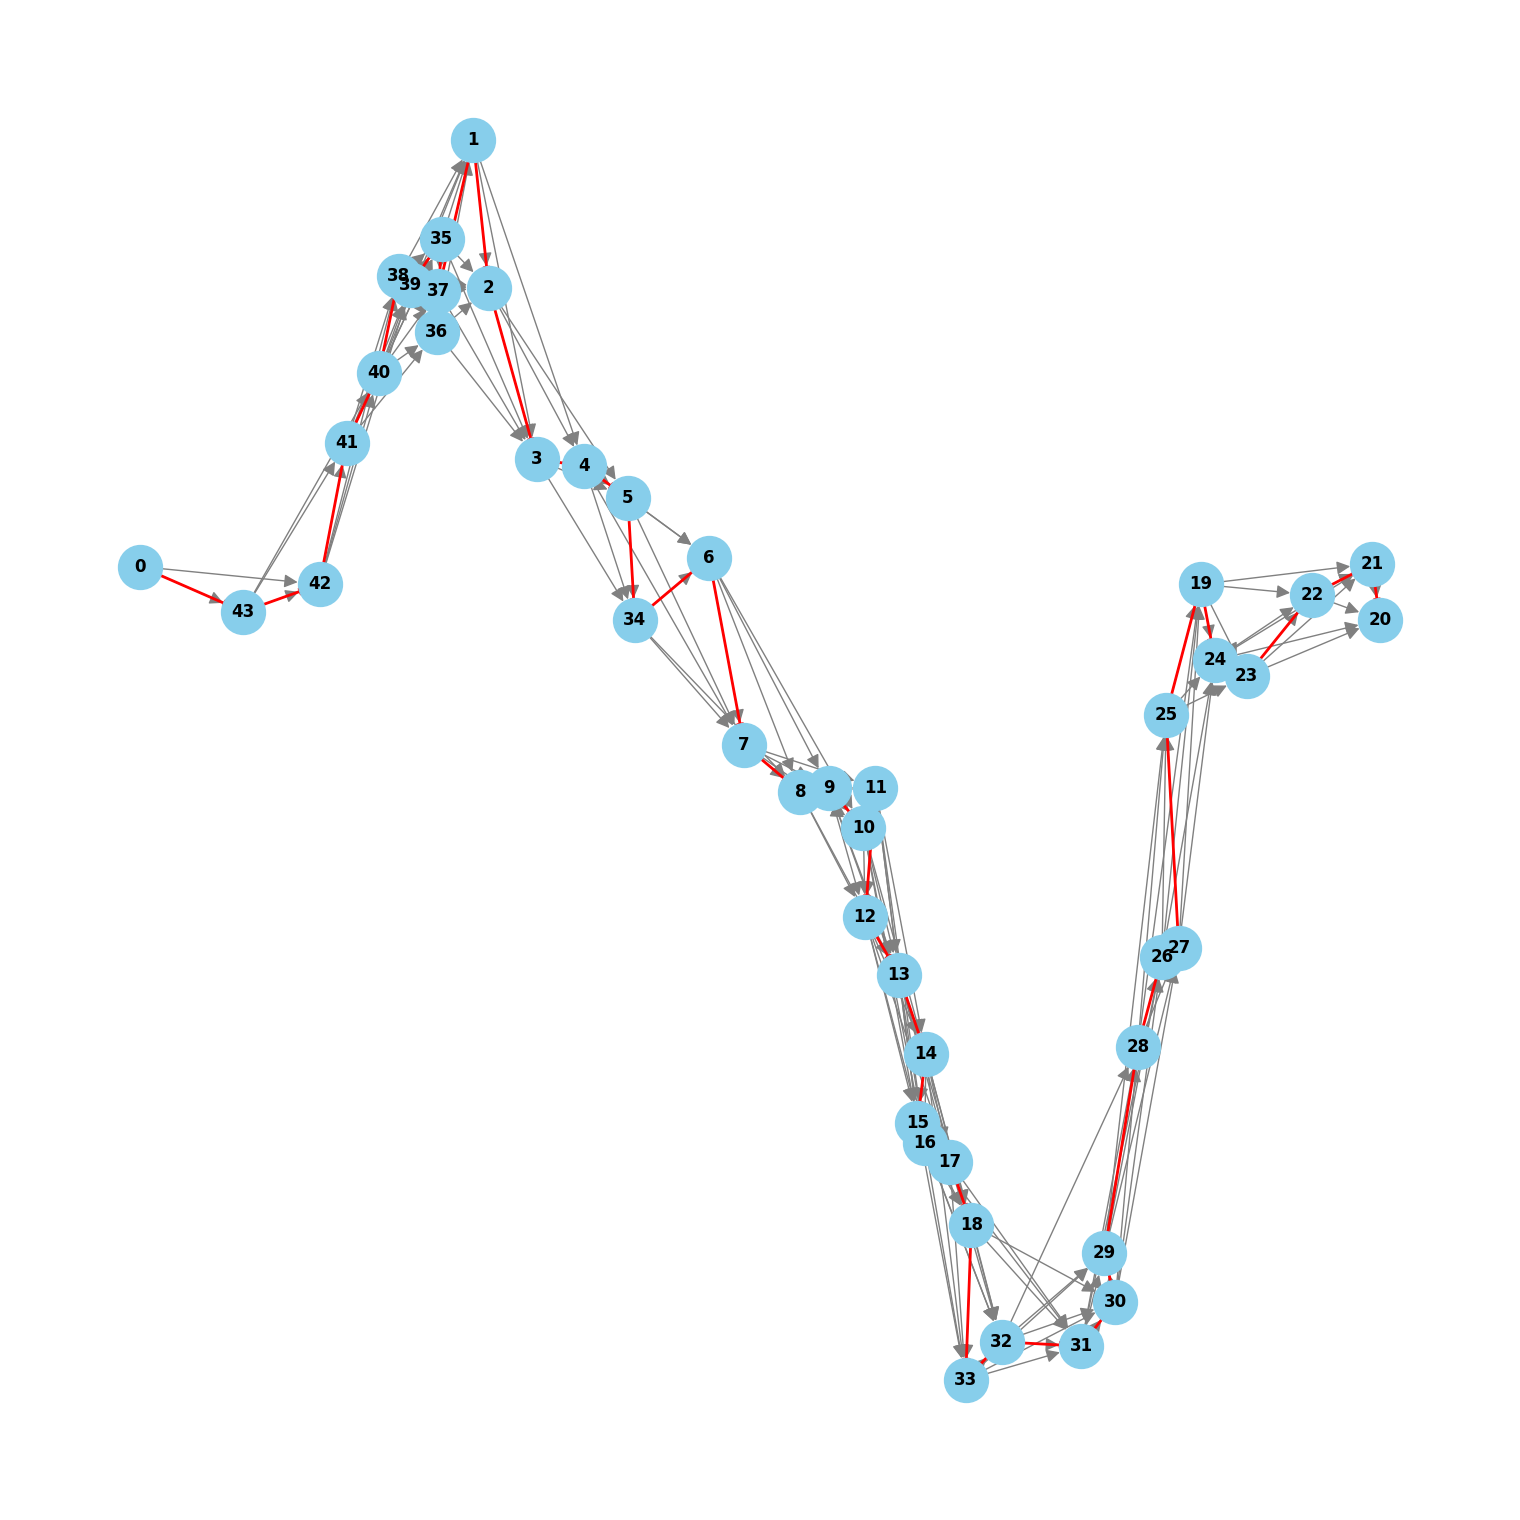

In [11]:
max_distance = 50_000  # 50,000 meters
valid_arcs_dict = {}
for i, start_node in enumerate(ordered_path):
    accumulated_distance = 0
    for next_node in ordered_path[i + 1:]:
        accumulated_distance += distance_matrix[start_node][next_node]
        if accumulated_distance <= max_distance:
            if not G.has_edge(start_node, next_node):
               G.add_edge(start_node, next_node, distance=accumulated_distance)
            valid_arcs_dict[(start_node, next_node)] = accumulated_distance
        elif accumulated_distance > max_distance:
            break

# Create a list of edges for the original path
original_path_edges = [(ordered_path[i], ordered_path[i + 1]) for i in range(len(ordered_path) - 1)]

# Visualization
plt.figure(figsize=(15, 15))
# Draw the graph with all connections
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=12, font_color="black", font_weight="bold",
        node_color="skyblue", edge_color="gray", arrowsize=20)

# Highlight the original path in red
nx.draw_networkx_edges(G, pos, edgelist=original_path_edges, edge_color='red', width=2)

plt.show()

If you want to reset the graph to its original state, run the cell on top of this one again.

In [26]:
# Create a 2D array for faster distance lookups
max_id = max(od_data['origin_id'].max(), od_data['destination_id'].max())

print(valid_arcs_dict)
# Create model
m = mip.Model()

# define the variables
# x_i variable for selection of nodes
x = [m.add_var(var_type=mip.BINARY, name=f"x{ordered_path[i]}___{i}") for i in range(n)]
print(f"num x: {len(x)}")

# y_ij variable if we have charging station at point i and at point j
print(ordered_path)


y = [[m.add_var(var_type=mip.BINARY, name=f"y{i}_{j}") for j in range(n)] for i in range(n)]
print(f"num y: {len(y)}")
y_dummy = [[[m.add_var(var_type=mip.BINARY, name=f"y_dummy{l}_{i}_{j}") for j in range(n)] for i in range(n)] for l in range(4)]
print(f"num dummy: {len(y_dummy)}")

#  define the constraints

# Budget Constraint
m += mip.xsum(nodes_data.loc[i, 'Cost_of_installation [euro]'] * x[i] for i in nodes_data.index) <= budget
# Linking constraint
m += x[0] == 1
m += x[-1] == 1
for i in range(n):
    for j in range(n):
        if i != j:
            m += x[i] + x[j] <= 1 + 3 * y_dummy[0][i][j]
            m += y[i][j] - 1 + 3*y_dummy[1][i][j]>= 0
            m += x[i] + x[j] + 3 * y_dummy[2][i][j] >= 2
            m += y[i][j] <= 3 * y_dummy[3][i][j]

            m += y_dummy[0][i][j] + y_dummy[1][i][j] <= 1
            m += y_dummy[2][i][j] + y_dummy[3][i][j] <= 1
            #(Np or q) and (p or Nq)
            #Np or Nq or q or p

# Dummy Variable constraint
z = m.add_var(lb=0.0, var_type=mip.CONTINUOUS, name='max_distance')
# Now, add a constraint to ensure that z is greater than or equal to each d_ij * y_ij
for i in range(n):  # Assuming n is the number of tourist sites
    for j in range(i+1, n):
        m += valid_arcs_dict.get((ordered_path[i], ordered_path[j]), 0) * y[i][j] <= z

    m += mip.xsum(x[l] for l in range(i+1, n) if (ordered_path[i], ordered_path[l]) in valid_arcs_dict) == 1


# Flow Conservation Constraints
# Flow Conservation Constraints
b = {i: 0 for i in range(n)}
b[first_node] = 1       # Start node (s)
b[last_node] = -1  # Final node (t)

#for i in ordered_path:
#     m += mip.xsum(y[i,j] for j in ordered_path if (i,j) in valid_arcs) -
#                  mip.xsum(y[j,i] for j in ordered_path if (j,i) in valid_arcs) ==
#                  b[i])


# TO DO


# optimize objective function
m.objective = mip.minimize(z)

# TO DO


m.optimize()

{(0, 43): 16011.18979, (0, 42): 45229.55898, (43, 42): 13821.26248, (43, 41): 28376.195099999997, (43, 40): 47720.25313, (42, 41): 4298.157018, (42, 40): 13385.439451, (42, 38): 23952.908800999998, (42, 39): 35466.605641, (41, 40): 5479.584144, (41, 38): 12439.355208, (41, 39): 20345.353755, (41, 35): 32029.405855, (41, 36): 45956.312045, (40, 38): 3636.367715, (40, 39): 8218.962913, (40, 35): 16579.611662, (40, 36): 27183.114501999997, (40, 37): 36900.03369899999, (40, 1): 48113.134248999995, (38, 39): 1569.029191, (38, 35): 6916.111932, (38, 36): 14506.048768, (38, 37): 21209.401957000002, (38, 1): 29408.936502000004, (38, 2): 41063.37822200001, (39, 35): 4758.679015, (39, 36): 11760.212125999999, (39, 37): 17875.161589, (39, 1): 25486.292409, (39, 2): 36552.330409, (35, 36): 2242.854095, (35, 37): 3599.124543, (35, 1): 8294.35628, (35, 2): 16444.495195, (35, 3): 34513.527365, (36, 37): 989.5244837, (36, 1): 7927.6103157, (36, 2): 18320.6033257, (36, 3): 38632.4895857, (37, 1): 6051.

<OptimizationStatus.INFEASIBLE: 1>

In [27]:
for i in range(len(m.vars)):
   if m.vars[i].x and "dummy" not in str(m.vars[i]):
      print(m.vars[i], end=", ")

print(m.objective_value)

None


In [28]:
import mip

def find_valid_arcs(ordered_path, distance_matrix, max_distance):
    valid_arcs = {}

    for i in range(len(ordered_path) - 1):
        for j in range(i + 1, len(ordered_path)):
            origin_id_i, destination_id_i = ordered_path[i], ordered_path[j]

            cumulative_distance = np.sum(distance_matrix[ordered_path[i:j], ordered_path[i+1:j+1]])

            if cumulative_distance > max_distance:
                break  # Move to the next item
            else:
                valid_arcs[(origin_id_i, destination_id_i)] = cumulative_distance

    return valid_arcs


valid_arcs = find_valid_arcs(ordered_path, distance_matrix, max_distance)


# Create model
m = mip.Model()

# define the variables
# x_i variable for selection of nodes
x = [m.add_var(var_type=mip.BINARY, name=f"x_{i}") for i in range(n)]
print(f"number of x: {len(x)}")
# y_ij variable if we have charging station at point i and at point j
y = {(i, j): m.add_var(var_type=mip.BINARY, name=f"y_{i}-{j}") for (i, j) in valid_arcs.keys()}
print(f"number of y: {len(y)}")


#  define the constraints
# 1. Budget Constraint
m += mip.xsum(nodes_data.loc[i, 'Cost_of_installation [euro]'] * x[i] for i in nodes_data.index) <= 60_000

# Linking constraint
for i in nodes_data.index:
  for j in nodes_data.index:
      if (i, j) in valid_arcs.keys():
        # print("Linking Constraint:", i, j, x[i].name, x[j].name, y[i, j].name)
        m += y[i, j] <= x[i] + x[j] - 1

# Dummy Variable constraint
z = m.add_var(lb=0.0, var_type=mip.CONTINUOUS, name='max_distance')
# Now, add a constraint to ensure that z is greater than or equal to each d_ij * y_ij
for i, j in valid_arcs.keys():
  m += valid_arcs[i, j] * y[i, j] <= z

# Flow Conservation Constraints
b = {i: 0 for i in nodes_data.index}
b[first_node] = 1       # Start node (s)
b[last_node] = -1  # Final node (t)

for i in nodes_data.index:
    m.add_constr(mip.xsum(y[i,j] for j in nodes_data.index if (i,j) in valid_arcs.keys()) -
                 mip.xsum(y[j,i] for j in nodes_data.index if (j,i) in valid_arcs.keys()) ==
                 b[i])


# optimize objective function
m.objective = mip.minimize(z)

# # TO DO


m.optimize()
print("objective: ", m.objective_value)
for i in range(len(x)):
  print(m.vars[i], m.vars[i].x)
# print(m.objective_value)

number of x: 44
number of y: 354
objective:  None
x_0 None
x_1 None
x_2 None
x_3 None
x_4 None
x_5 None
x_6 None
x_7 None
x_8 None
x_9 None
x_10 None
x_11 None
x_12 None
x_13 None
x_14 None
x_15 None
x_16 None
x_17 None
x_18 None
x_19 None
x_20 None
x_21 None
x_22 None
x_23 None
x_24 None
x_25 None
x_26 None
x_27 None
x_28 None
x_29 None
x_30 None
x_31 None
x_32 None
x_33 None
x_34 None
x_35 None
x_36 None
x_37 None
x_38 None
x_39 None
x_40 None
x_41 None
x_42 None
x_43 None
